In [93]:
import pandas as pd

In [94]:
data = pd.read_csv("./data/spam.csv",encoding='latin1')

In [95]:
data_copy = data.copy()

In [96]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4790,ham,Send me your resume:-),NaN,NaN,NaN
3159,ham,How much did ur hdd casing cost.,NaN,NaN,NaN
3075,ham,"Mum, hope you are having a great day. Hoping t...",NaN,NaN,NaN
5272,ham,Hello.How u doing?What u been up 2?When will u...,NaN,NaN,NaN
343,ham,Am not interested to do like that.,NaN,NaN,NaN


In [97]:
data.shape

(5572, 5)

In [98]:
 data.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [99]:
data.duplicated().sum()

np.int64(403)

In [100]:
data.drop_duplicates(inplace=True)

In [101]:
data.duplicated().sum()

np.int64(0)

In [102]:
new_df = data[['v1','v2']].copy()

In [103]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
new_df.iloc[2].v2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [105]:
new_df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [106]:
new_df.sample(5)

,target,text
5268,ham,\ER
844,ham,K.k:)when are you going?
5523,ham,Going to join tomorrow.
3355,ham,Ok not a problem will get them a taxi. C ing ...
12,spam,URGENT! You have won a 1 week FREE membership ...


In [107]:
from sklearn.preprocessing import LabelEncoder

In [108]:
encoder = LabelEncoder()

In [109]:
new_df['target'] = encoder.fit_transform(new_df['target'])

In [110]:
new_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
new_df.duplicated().sum()

np.int64(0)

In [112]:
new_df.isna().sum()

target    0
text      0
dtype: int64

<h1>EDA</h1

In [113]:
import matplotlib.pyplot as plt

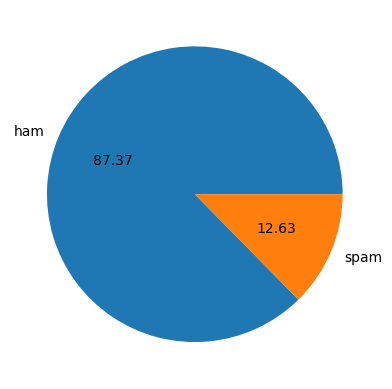

In [114]:
plt.pie(new_df['target'].value_counts() , labels=['ham','spam'],autopct = '%0.2f')
plt.show()

In [115]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [116]:
new_df['num_characters'] = new_df['text'].apply(len)

In [117]:
new_df.sample()

,target,text,num_characters
5137,1,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,164


In [118]:
new_df['num_words'] = new_df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [119]:
new_df['num_sentences'] = new_df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [120]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

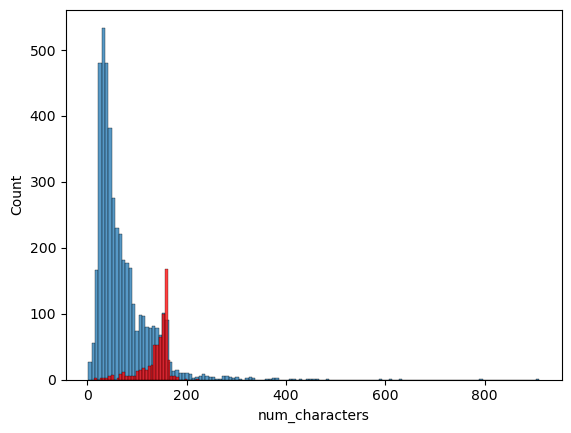

In [121]:
sns.histplot(new_df[new_df['target'] == 0]['num_characters'])
sns.histplot(new_df[new_df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

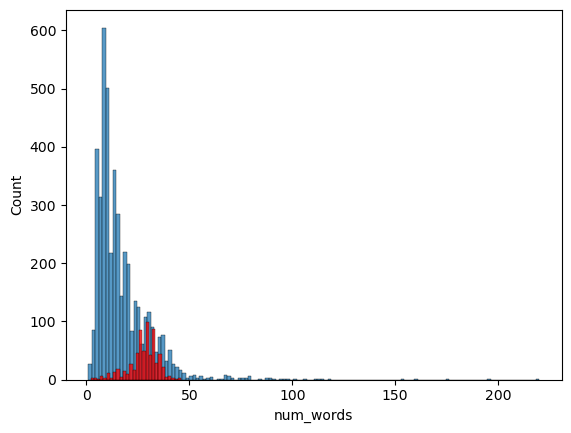

In [122]:
sns.histplot(new_df[new_df['target'] == 0]['num_words'])
sns.histplot(new_df[new_df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

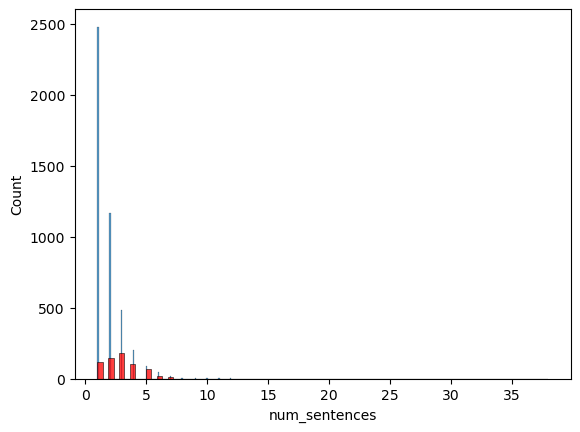

In [123]:
sns.histplot(new_df[new_df['target'] == 0]['num_sentences'])
sns.histplot(new_df[new_df['target'] == 1]['num_sentences'],color='red')

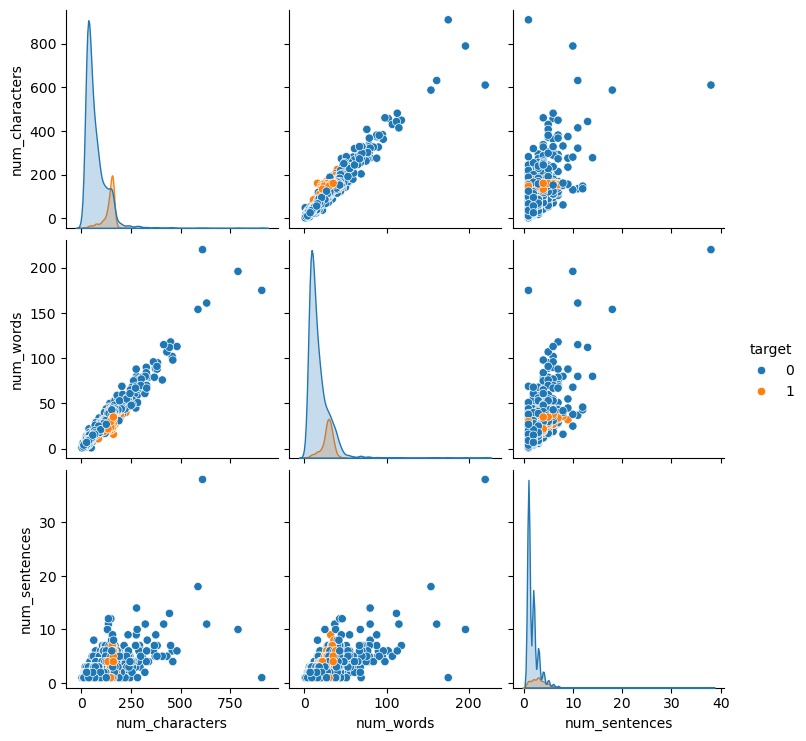

In [124]:
sns.pairplot(new_df,hue='target')

<Axes: >

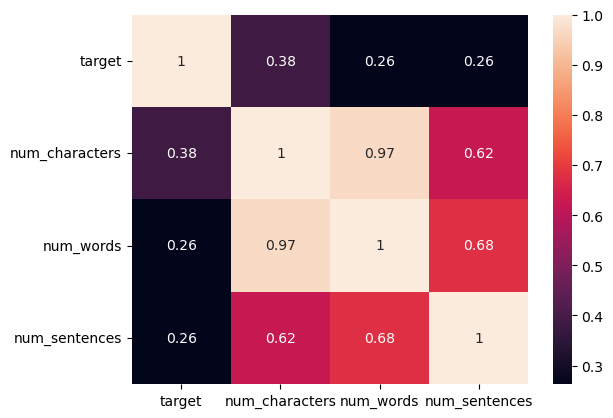

In [125]:
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)


In [126]:
from nltk.corpus import stopwords
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [127]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    text = l.copy()
    l.clear()
    for i in text :
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(ps.stem(i))
    return " ".join(l)
            
    

In [128]:
transform_text('I loved the YT lectures on Machine Learning?')

'love yt lectur machin learn'

In [129]:
new_df['text'] = new_df['text'].apply(transform_text)

In [130]:
new_df['text'].sample(5)

3878    left vagu said would inform person account del...
2620                                                 come
2062                                       train tomorrow
1176    say fantast chanc anyth need bigger life lift ...
262                     luton 0125698789 ring ur around h
Name: text, dtype: object

In [131]:
new_df['text'][2745]

'r go 4 today meet'

In [132]:
!pip install wordcloud

In [133]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white')

In [134]:
spam_wc = wc.generate(new_df[new_df['target'] == 1]['text'].str.cat(sep=' '))

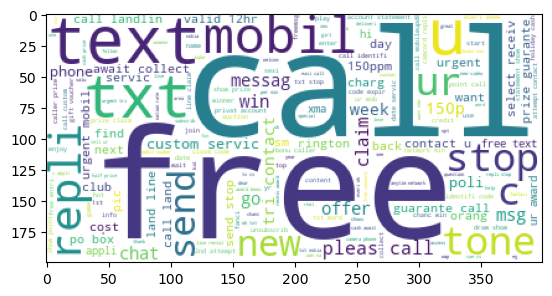

In [135]:
plt.imshow(spam_wc)

In [136]:
ham_wc = wc.generate(new_df[new_df['target'] == 0]['text'].str.cat(sep=' '))

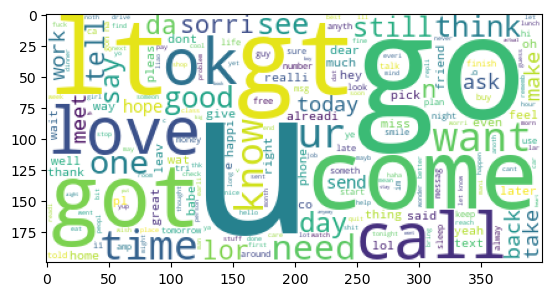

In [137]:
plt.imshow(ham_wc)

In [138]:
spam_corpas = []

for msg in new_df[new_df['target']==1]['text'].tolist():
    for word in msg.split():
        spam_corpas.append(word)

In [139]:
len(spam_corpas)

9939

In [140]:
from collections import Counter

In [141]:
pd.DataFrame(Counter(spam_corpas).most_common(10))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


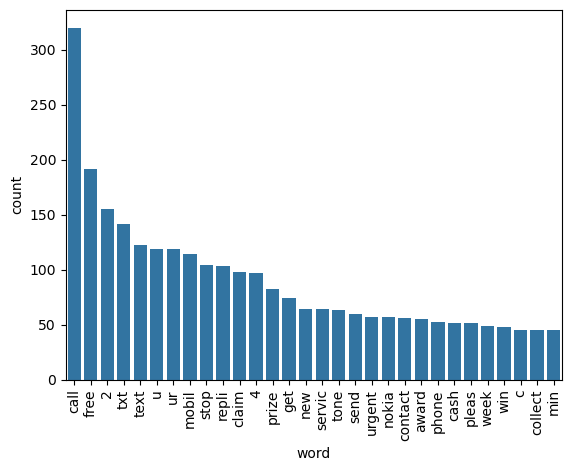

In [142]:
most_common_df = pd.DataFrame(Counter(spam_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

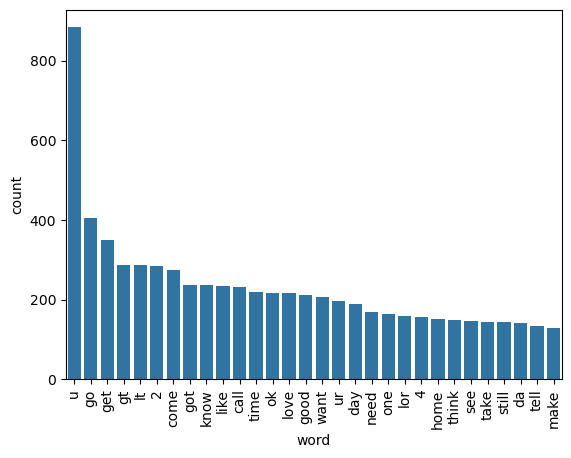

In [143]:
ham_corpas = []

for msg in new_df[new_df['target']==0]['text'].tolist():
    for word in msg.split():
        ham_corpas.append(word)

most_common_ham_word = pd.DataFrame(Counter(ham_corpas).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_ham_word)
plt.xticks(rotation='vertical')
plt.show()

<h1>Model building<h1>

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features=2500)
import numpy as np

In [197]:
X = tfv.fit_transform(new_df['text']).toarray()

In [198]:
# X = np.hstack((X,new_df['num_characters'].values.reshape(-1,1)))

In [199]:
X.shape 

(5169, 2500)

In [200]:
y = new_df['target'].values

In [201]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [204]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [205]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [206]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8539651837524178
[[762 127]
 [ 24 121]]
0.4879032258064516


In [207]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[888   1]
 [ 25 120]]
0.9917355371900827


In [208]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[884   5]
 [ 18 127]]
0.9621212121212122


In [209]:
import pickle

In [211]:
pickle.dump(mnb,open('model.pkl','wb'))